In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
train =pd.read_csv('sign_mnist_train.csv')
test =pd.read_csv('sign_mnist_test.csv')

# New section

In [ ]:
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
class_names[2]

'C'

(-0.5, 27.5, 27.5, -0.5)

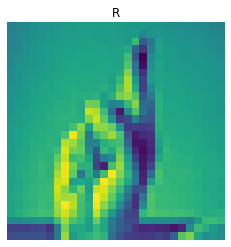

In [ ]:
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

In [ ]:
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
print(type(X_test))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

<class 'numpy.ndarray'>


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 22s 484ms/step - loss: 3.1962 - accuracy: 0.0449 - val_loss: 3.0943 - val_accuracy: 0.1198
Epoch 2/50
43/43 [==============================] - 20s 475ms/step - loss: 2.9185 - accuracy: 0.1124 - val_loss: 2.3335 - val_accuracy: 0.2845
Epoch 3/50
43/43 [==============================] - 21s 482ms/step - loss: 2.2215 - accuracy: 0.2776 - val_loss: 1.5068 - val_accuracy: 0.5414
Epoch 4/50
43/43 [==============================] - 20s 476ms/step - loss: 1.5391 - accuracy: 0.4821 - val_loss: 0.9863 - val_accuracy: 0.6846
Epoch 5/50
43/43 [==============================] - 20s 476ms/step - loss: 1.1709 - accuracy: 0.5962 - val_loss: 0.7389 - val_accuracy: 0.7835
Epoch 6/50
43/43 [==============================] - 20s 477ms/step - loss: 0.9343 - accuracy: 0.6739 - val_loss: 0.5765 - val_accuracy: 0.8179
Epoch 7/50
43/43 [==============================] - 20s 475ms/step - loss: 0.7571 - accuracy: 0.7382 - val_loss: 0.4122 - val_accuracy: 0.8856

In [ ]:
import cv2
import pandas as pd
import numpy as np
from PIL import Image
l=[]

i=0
while i<3:
  image=str(i)+'.jpeg';
  img_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
  img_pil = Image.fromarray(img_array)
  img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
  resize=img_28x28.flatten()/255
  l.append(resize)
  i+=1


In [ ]:
l

[array([0.72941176, 0.7372549 , 0.72156863, 0.73333333, 0.72156863,
        0.72156863, 0.72941176, 0.7254902 , 0.7254902 , 0.72941176,
        0.71372549, 0.7254902 , 0.72156863, 0.71764706, 0.71372549,
        0.71372549, 0.70196078, 0.69803922, 0.69803922, 0.69019608,
        0.6745098 , 0.67843137, 0.66666667, 0.65882353, 0.63529412,
        0.59607843, 0.56862745, 0.52941176, 0.72941176, 0.73333333,
        0.72941176, 0.74117647, 0.73333333, 0.72156863, 0.72941176,
        0.7254902 , 0.73333333, 0.73333333, 0.72156863, 0.72941176,
        0.72156863, 0.72156863, 0.71764706, 0.71372549, 0.70588235,
        0.70588235, 0.70588235, 0.69411765, 0.69803922, 0.69019608,
        0.67843137, 0.6745098 , 0.6745098 , 0.6627451 , 0.65490196,
        0.6627451 , 0.72941176, 0.7372549 , 0.7372549 , 0.74117647,
        0.73333333, 0.73333333, 0.73333333, 0.73333333, 0.74117647,
        0.74117647, 0.72941176, 0.72941176, 0.71372549, 0.7254902 ,
        0.72941176, 0.75294118, 0.76078431, 0.72

In [ ]:
s=""
for j in l:
  X1 = j[:].reshape(1, *(28, 28, 1))
  predicted_classes = cnn_model.predict_classes(X1)
  k=predicted_classes[0]
  s+=class_names[k]
print(s)




CAB


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2])